<a href="https://colab.research.google.com/github/anyaozm/Blood-Donation-Prediction/blob/master/StockLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Desc: LSTM for Closing Stock Price

In [2]:
#import
%tensorflow_version 1.x
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

TensorFlow 1.x selected.
Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


In [0]:
df = web.DataReader('SPY', data_source='yahoo', start='1960-01-01', end='2020-03-24')

In [4]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1993-01-29,43.968750,43.750000,43.968750,43.937500,1003200.0,26.299288
1993-02-01,44.250000,43.968750,43.968750,44.250000,480500.0,26.486324
1993-02-02,44.375000,44.125000,44.218750,44.343750,201300.0,26.542448
1993-02-03,44.843750,44.375000,44.406250,44.812500,529400.0,26.822998
1993-02-04,45.093750,44.468750,44.968750,45.000000,531500.0,26.935240
...,...,...,...,...,...,...
2020-03-18,248.369995,228.020004,236.250000,240.000000,327597100.0,238.596985
2020-03-19,247.380005,232.220001,239.250000,240.509995,289322000.0,239.103989
2020-03-20,244.470001,228.500000,242.529999,228.800003,347158800.0,228.800003


In [5]:
#Get rows and columns
df.shape

(6837, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price')

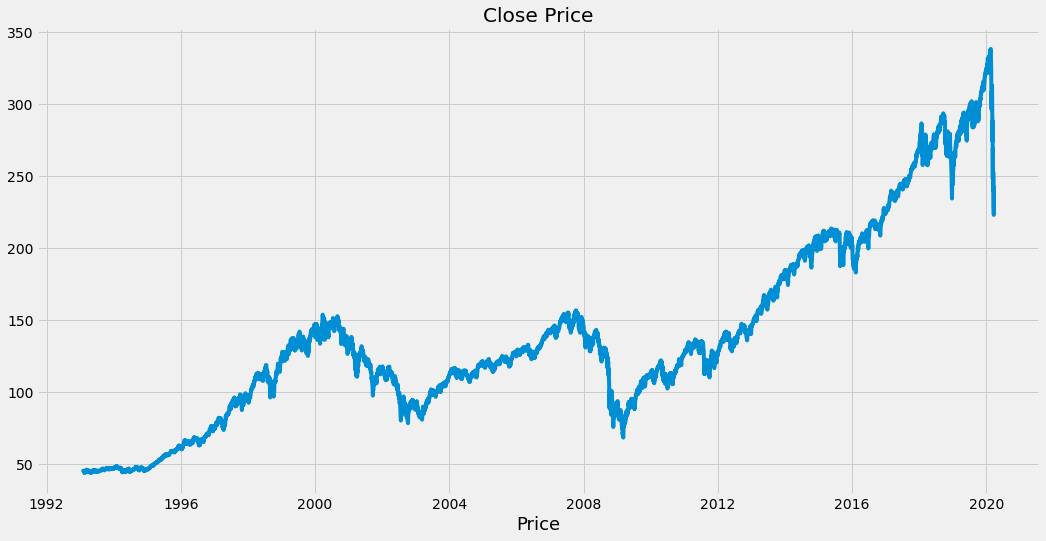

In [6]:
#visualize
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.xlabel('Price',fontsize=18)

In [7]:
#Create df with only close
data =df.filter(['Close'])
#convert the df into a numpy array
dataset=data.values
#get the number of rows to train
training_data_len = math.ceil(len(dataset)*.8) #math.ceil to round up

training_data_len

5470

In [0]:

#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [9]:
#Create training dataset
train_data = scaled_data[0:training_data_len, :] #after the comma for columns
#Split data 
x_train = []
y_train = []

for i in range(10, len(train_data)): #60 days
  x_train.append(train_data[i-10:i,0]) #not including i and 0th column
  y_train.append(train_data[i, 0])
  if i<=11:
    print(x_train)
    print(y_train)
    print()

[array([0.00180125, 0.00286081, 0.00317868, 0.00476802, 0.00540376,
       0.0052978 , 0.0052978 , 0.00423824, 0.00445015, 0.00519184])]
[0.004026327996524137]

[array([0.00180125, 0.00286081, 0.00317868, 0.00476802, 0.00540376,
       0.0052978 , 0.0052978 , 0.00423824, 0.00445015, 0.00519184]), array([0.00286081, 0.00317868, 0.00476802, 0.00540376, 0.0052978 ,
       0.0052978 , 0.00423824, 0.00445015, 0.00519184, 0.00402633])]
[0.004026327996524137, 0.00021191199981704378]



In [0]:
#convert train data to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#reshape LSTM is 3 dimensional rows, timesteps, number of features
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5460, 10, 1)

In [0]:
#Build LSTM model
model =Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Train model batch is total number of sample, epochs is the number of iters when it's passed
model.fit(x_train, y_train, batch_size=20, epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





5460/5460 [==============================] - 6s 1ms/step - loss: 0.0016
Epoch 2/10
5460/5460 [==============================] - 5s 840us/step - loss: 7.2604e-05
Epoch 3/10
5460/5460 [==============================] - 5s 860us/step - loss: 7.3233e-05
Epoch 4/10
5460/5460 [==============================] - 5s 830us/step - loss: 7.1993e-05
Epoch 5/10
5460/5460 [==============================] - 5s 855us/step - loss: 7.1605e-05
Epoch 6/10
5460/5460 [==============================] - 5s 856us/step - loss: 7.6918e-05
Epoch 7/10
5460/5460 [==============================] - 5s 852us/step - loss: 6.4790e-05
Epoch 8/10
5460/5460 [==============================] - 5s 825us/step - loss: 6.0903e-05
Epoch 9/10
5460/5460 [==============================] - 5s 825us/step - loss: 6.6041e-05
Epoch 10/10
5460/5460 [==============================] - 5s 828us/step - loss: 5.7585e-05


In [0]:
#create test data 
#create an array with scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 10: 6837,:]
#create x_test and y_test
x_test= []
y_test = dataset[training_data_len:,:]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])

In [0]:
#convert data to a numpy array
x_test = np.array(x_test)

In [0]:
#reshape
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
#rescale back to normal
predictions = scaler.inverse_transform(predictions)

In [19]:
#evalute get root mean squared error (RMSE) measures how good it is lower the better
rmse = np.sqrt(np.mean(predictions- y_test)**2)
rmse

0.13348829580556762

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


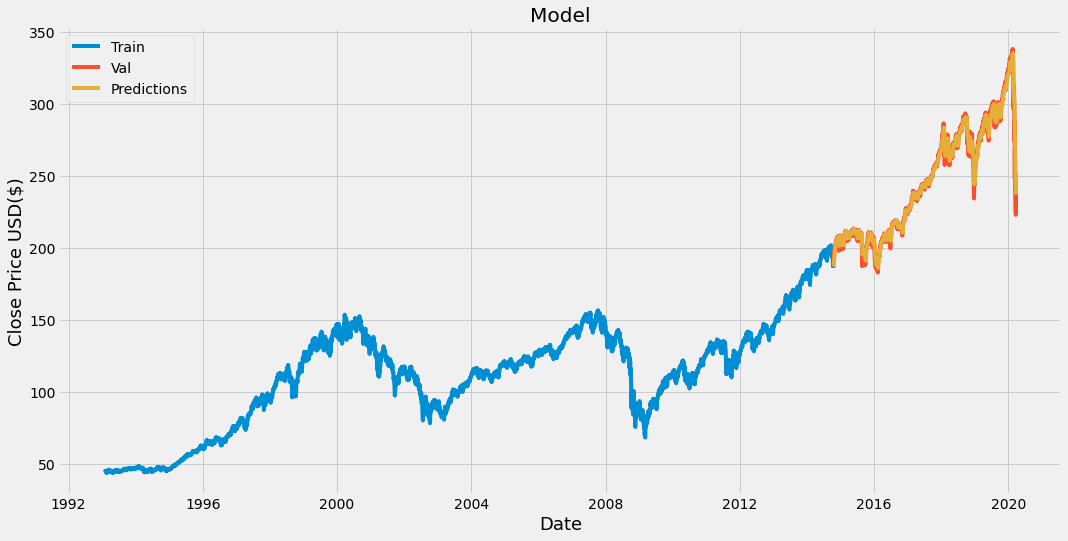

In [20]:
#Plot data
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'])
plt.show()

In [21]:
#Show the actual and predicted
validation

,Close,Predictions
Date,,
2014-10-17,188.470001,188.658905
2014-10-20,190.300003,188.182220
2014-10-21,194.070007,188.425125
2014-10-22,192.690002,189.592224
2014-10-23,194.929993,190.751190
...,...,...
2020-03-18,240.000000,258.639496
2020-03-19,240.509995,252.981674
2020-03-20,228.800003,248.445724


In [22]:
#get the quote 
apple_quote = web.DataReader('SPY', data_source='yahoo', start='1960-01-01', end='2020-03-24')
#Create a new df
new_df = apple_quote.filter(['Close'])
#get the last 60 day closing price vals and convert data to an array
last_10_days = new_df[-10:].values
#Scale the data to be between 0-1
last_10_days_scaled = scaler.transform(last_10_days)
#create empty list
X_test = []
#Append past 10 days
X_test.append(last_10_days_scaled)
#convert X_test to a numpy array
X_test = np.array(X_test)
#reshape 3D
X_test =np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)

[[236.01973]]


In [23]:
#get the quote 
apple_quote2 = web.DataReader('SPY', data_source='yahoo', start='2020-03-10', end='2020-03-24')
print(apple_quote2['Close'])

Date
2020-03-10    288.420013
2020-03-11    274.359985
2020-03-12    248.110001
2020-03-13    269.320007
2020-03-16    239.850006
2020-03-17    252.800003
2020-03-18    240.000000
2020-03-19    240.509995
2020-03-20    228.800003
2020-03-23    222.949997
2020-03-24    243.149994
Name: Close, dtype: float64


In [24]:
validation['Pr1'] = validation['Close'].shift(-1)
validation['Pr2'] = validation['Predictions'].shift(-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
validation['Pricediff1'] = validation['Pr1']- validation['Close']
validation['Pricediff2'] =validation['Pr2']- validation['Predictions']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
validation['Daily Return'] = validation['Pricediff1']/validation['Close']
validation['Daily Return2'] = validation['Pricediff2']/validation['Predictions']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
validation

,Close,Predictions,Pr1,Pr2,Pricediff1,Pricediff2,Daily Return,Daily Return2
Date,,,,,,,,
2014-10-17,188.470001,188.658905,190.300003,188.182220,1.830002,-0.476685,0.009710,-0.002527
2014-10-20,190.300003,188.182220,194.070007,188.425125,3.770004,0.242905,0.019811,0.001291
2014-10-21,194.070007,188.425125,192.690002,189.592224,-1.380005,1.167099,-0.007111,0.006194
2014-10-22,192.690002,189.592224,194.929993,190.751190,2.239990,1.158966,0.011625,0.006113
2014-10-23,194.929993,190.751190,196.429993,192.086075,1.500000,1.334885,0.007695,0.006998
...,...,...,...,...,...,...,...,...
2020-03-18,240.000000,258.639496,240.509995,252.981674,0.509995,-5.657822,0.002125,-0.021875
2020-03-19,240.509995,252.981674,228.800003,248.445724,-11.709991,-4.535950,-0.048688,-0.017930
2020-03-20,228.800003,248.445724,222.949997,243.080719,-5.850006,-5.365005,-0.025568,-0.021594


In [28]:
validation['Direction Real'] = [1 if validation.loc[i, 'Pricediff1'] > 0 else -1
                                for i in validation.index]
validation['Direction Prediction'] = [1 if validation.loc[i, 'Pricediff2'] > 0 else -1
                                for i in validation.index]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
validation['Compare'] = [1 if validation.loc[i, 'Direction Real'] == validation.loc[i, 'Direction Prediction'] else 0 for i in validation.index]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
validation['Compare'].sum()

678

In [31]:
len(validation['Compare'])

1367

In [33]:
validation

,Close,Predictions,Pr1,Pr2,Pricediff1,Pricediff2,Daily Return,Daily Return2,Direction Real,Direction Prediction,Compare
Date,,,,,,,,,,,
2014-10-17,188.470001,188.658905,190.300003,188.182220,1.830002,-0.476685,0.009710,-0.002527,1,-1,0
2014-10-20,190.300003,188.182220,194.070007,188.425125,3.770004,0.242905,0.019811,0.001291,1,1,1
2014-10-21,194.070007,188.425125,192.690002,189.592224,-1.380005,1.167099,-0.007111,0.006194,-1,1,0
2014-10-22,192.690002,189.592224,194.929993,190.751190,2.239990,1.158966,0.011625,0.006113,1,1,1
2014-10-23,194.929993,190.751190,196.429993,192.086075,1.500000,1.334885,0.007695,0.006998,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-18,240.000000,258.639496,240.509995,252.981674,0.509995,-5.657822,0.002125,-0.021875,1,-1,0
2020-03-19,240.509995,252.981674,228.800003,248.445724,-11.709991,-4.535950,-0.048688,-0.017930,-1,-1,1
2020-03-20,228.800003,248.445724,222.949997,243.080719,-5.850006,-5.365005,-0.025568,-0.021594,-1,-1,1
